# Comparing profiles

In [14]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os

In [15]:
def get_profiled_data(profile_root, hp_name, city, task_id):
    profile_path = os.path.join(profile_root, "{}.json".format(city))
    with open(profile_path) as f:
        profile_data = json.load(f)
    column_format = ['name', 'start_acc', 'actual_end_acc', 'resource_time']
    df = pd.DataFrame(profile_data['taskwise_train_profiles'][str(task_id)], columns=column_format)
    row = df[df['name']==hp_name].iloc[0]
    start_acc = row['start_acc']
    end_acc = row['actual_end_acc']
    resource_time = 0 # This should be gotten from get_sim_completion_times
    return start_acc, end_acc, resource_time, df

In [28]:
NEW_PROFILE_ROOT = '/home/romilb/research/msr/results/profiling_sys/0716_fixedseed_10cam/profiles/meta/profiles/'
SIGCOMM_PROFILE_ROOT = '/home/romilb/research/msr/results/profiling_sys/sigcomm_orig_profiles/meta/profiles/'

In [29]:
_, _, _, df_new = (get_profiled_data(NEW_PROFILE_ROOT, "0_8", "zurich", "5"))

In [30]:
_, _, _, df_sigcomm = (get_profiled_data(SIGCOMM_PROFILE_ROOT, "0_19", "zurich", "5"))

In [31]:
df_new

,name,start_acc,actual_end_acc,resource_time
0,2_8,0.535714,0.535714,48.440514
1,2_17,0.535714,0.535714,96.784083
2,2_29,0.535714,0.535714,161.290067
3,5_8,0.535714,0.595238,114.210666
4,5_17,0.535714,0.595238,228.696017
5,5_29,0.535714,0.607143,380.926524
6,3_8,0.535714,0.476190,11.293207
7,3_17,0.535714,0.476190,22.694464
8,3_29,0.535714,0.476190,37.963814
9,0_8,0.535714,0.607143,4.873027


In [26]:
max(df_sigcomm['actual_end_acc']) - max(df_new['actual_end_acc'])

0.023809523809523836

In [23]:
df_sigcomm

,name,start_acc,actual_end_acc,resource_time
0,2_9,0.535714,0.607143,12.763341
1,2_19,0.535714,0.607143,25.586483
2,2_29,0.535714,0.619048,38.376812
3,15_9,0.607143,0.607143,8.029295
4,15_19,0.607143,0.607143,16.060768
5,15_29,0.607143,0.607143,24.104394
6,5_9,0.535714,0.630952,22.055679
7,5_19,0.535714,0.630952,44.106358
8,5_29,0.535714,0.630952,66.162618
9,12_9,0.607143,0.607143,3.069335


In [32]:
cities = ['aachen', 'bochum', 'bremen', 'darmstadt', 'dusseldorf', 'monchengladbach', 'stuttgart', 'tubingen', 'zurich']

In [44]:
diffs = []
for city in cities:
    for t in range(1, 10):
        task_id = str(t)
        _, _, _, df_new = (get_profiled_data(NEW_PROFILE_ROOT, "0_8", city, task_id))
        _, _, _, df_sigcomm = (get_profiled_data(SIGCOMM_PROFILE_ROOT, "0_19", city, task_id))
        diff = max(df_sigcomm['actual_end_acc']) - max(df_new['actual_end_acc'])
        diffs.append(diff*100)

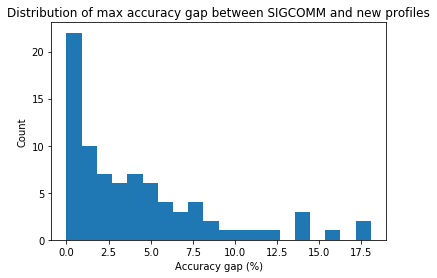

In [47]:
plt.hist(diffs,bins=20)
plt.xlabel('Accuracy gap (%)')
plt.ylabel('Count')
plt.title("Distribution of max accuracy gap between SIGCOMM and new profiles")
plt.savefig('acc_gap.pdf')

In [45]:
diffs

[0.0,
 1.3698630136986245,
 4.109589041095885,
 5.47945205479452,
 1.3698630136986245,
 1.3698630136986245,
 4.109589041095896,
 1.3698630136986245,
 2.73972602739726,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.9230769230769273,
 0.0,
 0.0,
 0.0,
 6.310679611650483,
 3.8834951456310662,
 0.9708737864077666,
 5.339805825242728,
 3.398058252427183,
 1.9417475728155331,
 8.73786407766991,
 7.766990291262143,
 4.8543689320388435,
 18.055555555555546,
 2.777777777777779,
 12.5,
 11.111111111111105,
 13.888888888888884,
 0.0,
 0.0,
 1.388888888888884,
 1.388888888888884,
 3.4682080924855585,
 1.7341040462427793,
 0.5780346820809301,
 2.8901734104046284,
 0.0,
 5.780346820809246,
 1.1560693641618491,
 5.202312138728315,
 0.5780346820809301,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0000000000000036,
 7.9999999999999964,
 9.999999999999998,
 0.0,
 0.0,
 9.756097560975618,
 14.02439024390244,
 1.8292682926829285,
 0.6097560975609762,
 0.6097560975609762,
 14.02439024390244,
 5.487804878048785,
 3.658536585365857,
 3.65